In [39]:
import pandas as pd 
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt 

# 맨 뒤 페이지 몇 페이지인지 구하기
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]
  
# 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'
for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(page_url, header=0)[0])
    
# 차트 출력 위해 데이터프레임 가공하기
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
df


,날짜,종가,전일비,시가,고가,저가,거래량
14,2020.10.23,238000.0,500.0,238500.0,242000.0,233500.0,723304.0
13,2020.10.26,238000.0,0.0,243000.0,249000.0,236500.0,945429.0
12,2020.10.27,239000.0,1000.0,237500.0,245000.0,234000.0,687981.0
11,2020.10.28,242500.0,3500.0,241000.0,243000.0,239000.0,426527.0
10,2020.10.29,253000.0,10500.0,239500.0,256000.0,239000.0,986149.0
9,2020.10.30,241000.0,12000.0,253000.0,253500.0,241000.0,825115.0
8,2020.10.30,241000.0,12000.0,253000.0,253500.0,241000.0,825115.0
7,2020.10.30,241000.0,12000.0,253000.0,253500.0,241000.0,825115.0
6,2020.10.30,241000.0,12000.0,253000.0,253500.0,241000.0,825115.0
5,2020.11.02,244500.0,3500.0,242500.0,249000.0,240000.0,486328.0


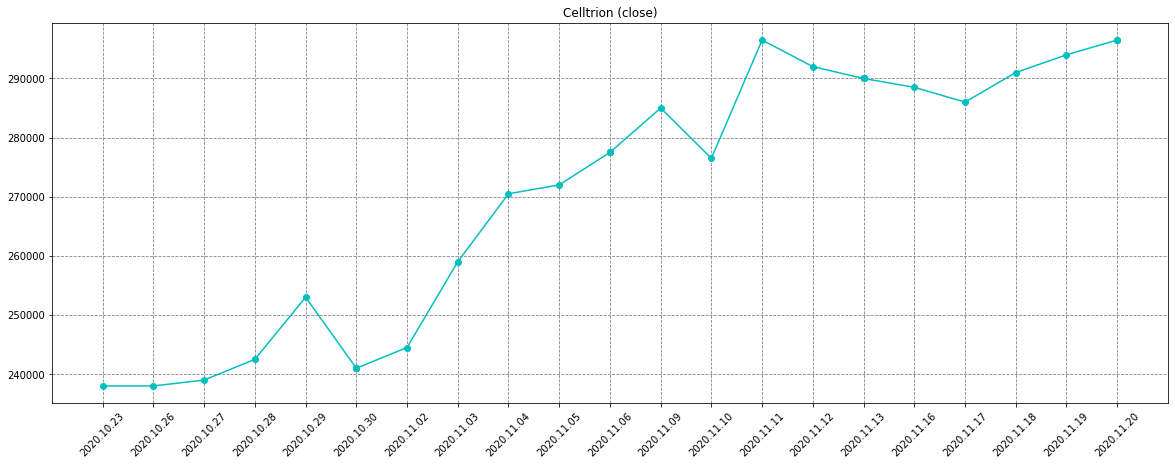

In [40]:
# 날짜 종가 칼럼으로 차트 그리기
plt.figure(figsize=(20,7))
plt.title('Celltrion (close)')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()